# CCBM 2023 Summer Programming Workshop
# Day 8 - Segment 1
## Topics:
- What is Machine Learning?
- Overview of Machine Learning Methods
- Logistic Regression Example
    - Data Cleaning and Preparation
    - Data Validation
    - Deploy and Evaluate Model
- Random Forest
- Machine Learning mini-challenge in Jupyter Notebook

## Objectives:
- Clean and prepare data using pandas and sci-kit learn
- Build an ML model with sci-kit learn
- Evaluate ML model
- More Data Visualization with matplotlib and seaborn
<br></br>

## What is Machine Learning?

![Arthur Samuel's Checkers program on the IBM 701](img/ibm700series_checkers.jpg)

"Machine learning is a branch of artificial intelligence (AI) and computer science which focuses on the use of data and algorithms to imitate the way that humans learn, gradually improving its accuracy."$^1$


1 https://www.ibm.com/cloud/learn/machine-learning

### Machine Learning Styles

#### Supervised Learning
Predictions are made from labeled (or tagged historical) data.
<div>
<img src= 'img/Labeled_Fruits.png' width=350>
</div>


#### Unsupervised Learning
Predictions are made from unlabeled data.
<div>
<img src= 'img/Unlabeled_Fruits.png' width=600>
</div>

### Machine Learning Models

There are many types of machine learning models. They primarily fall into two learning modes

#### Supervised Learning
- Regression models identify relationships between variables
- Classification models can assign data to correct groupings

#### Unsupervised Learning
- Clustering models group similar data points together without prior knowledge of their groups.
- Association models describe how large portions of data are associated



### Use Cases
- Sales Forecasting
- Customer Segment Analysis
- Insurance Claim Fraud Detection
- Spam Detection

### Applications
- Adaptive websites
- Recommendation engines
- Natural Language processing
- Search engines
- Speech and hand recognition

### Machine Learning Libraries
There are three main libraries that use Python for machine learning: TensorFlow (keras), PyTorch, and sci-kit learn. 
- TensorFlow is and end-to-end machine learning framework developed by Google and designed for fast numerical computing. Keras is built-on top of TensorFlow to create Deep Learning models. 
- PyTorch is developed by Facebook and is favored by the deep learning and AI research communities.
- Sci-kit learn has many data science and machine learning packages and resulted from the Summer of Code Project at Google in 2007 by David Cournapeau.

### Nomenclature
- Feature == independent variable, explanatory variable, predictor, column, attribute, or field
- Instance == row, observation, data point, or value
- Target == predictant, response variable, or dependent variable

## Logistic Regression Model

A good model for binary classification problems.

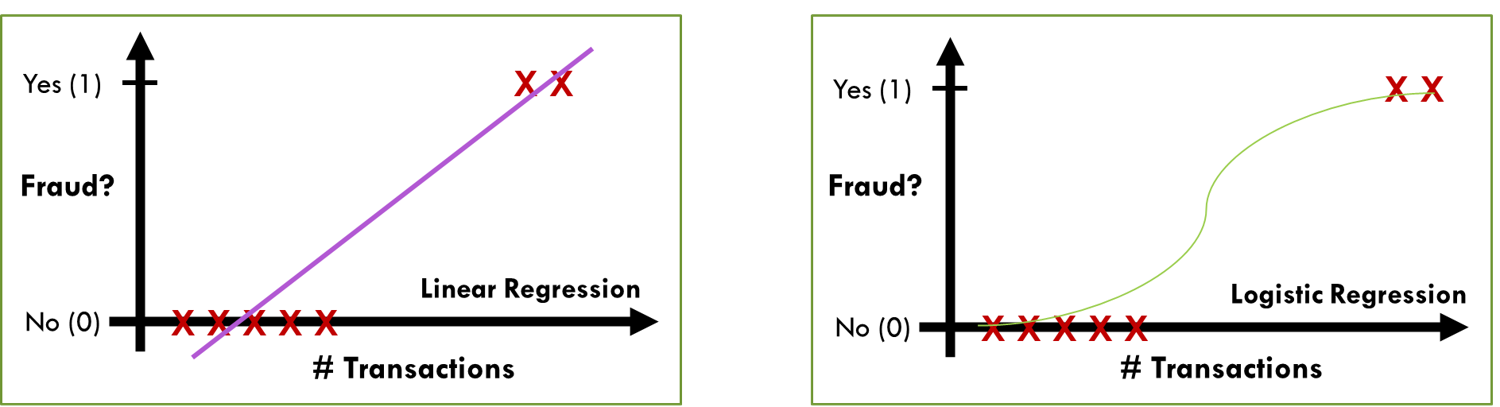

<br></br>
Sigmoid Function (or logistic function):
$$
S(x) = \frac{1}{1+e^{-x}}
$$
<br></br>

Let's look at how we can implement a logistic regression model to predict whether a student will graduate from a university in four years.


In [ ]:
# This is usually one of the first cells in a notebook

# Import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [ ]:
# Determine current working directory

import os
os.getcwd()

# Display all columns in a pandas dataframe
pd.set_option('display.max_columns', None)

In [ ]:
# Load the dirty version of the student dataset.
# We will use this dataset to learn how to clean data and 
# build a logistic regression model to predict Graduation

filename = "data/students_raw2.csv"

raw = pd.read_csv(filename)
raw.head()

## Data Cleaning and Preparation
### Assumptions in a Logistic Regression Model

Logistic Regression assumes:
- the data is free of null values
- the target variable is binary (or ordinal)
- features are independent
- there are enough data points to ensure reliable results

Let's see how we can address these assumptions:

In [ ]:
# Check target variable is binary
raw.Graduated.unique()

# Can also graphically check that target variable is binary
sns.countplot(x="Graduated", data=raw)

In [ ]:
# Cursory check for null values 
raw.info()

Four features contain some number of null values out of a total of 3100 entries:
- "AppliedtoanotherUC"
- "AdmittedtoanotherUC"
- "FirstGeneration"
- "MathPlacementScore"

In [ ]:
# Check for the maximum number of null values in a series in the dataframe

raw.AppliedtoanotherUC.isnull().sum()

In [ ]:
# Write a for loop to check for the number of null values for all applicable features
cols = ["AppliedtoanotherUC", "AdmittedtoanotherUC", "FirstGeneration", "MathPlacementScore"]

for col in cols:
    print(f"The column {col} contains:     {raw[col].isnull().sum()} null values")

#### Missing Data

Typical methods to handle missing data.
- Drop features containing mostly missing values
- If features are irrelevant, drop them too
- Impute missing data
    - Forward fill 
        - fill the missing data with the last valid observation.
    - Back fill 
        - fill the missing data with the next valid observation.
    - Fill with most frequently occurring value
    - Fill with mean value
- Still have missing data? Drop those observations provided they do not affect too many rows

In [ ]:
# Handling missing values. (1) Dropping columns
# Drop features containing mostly missing values
# Drop irrelevant features (eg., "ID"). No null values but is unlikely to contribute to predictive power

df = raw.drop(["ID", "AppliedtoanotherUC"], axis=1)
df.info()

In [ ]:
# Handling missing values. (2a) Impute values
df.MathPlacementScore

# Fill null value with last valid observation (forward fill)
##df.MathPlacementScore.fillna(method="ffill")

# Fill null value with next valid observation (back fill)
##df.MathPlacementScore.fillna(method="bfill")

In [ ]:
# Handling missing values. (2b) Impute values

# Fill null value with most frequently occurring value
# Note. mode method returns a pandas Series. Must subset result with [0] to obtain value
df.MathPlacementScore.mode()[0]
#df.MathPlacementScore.fillna(value=df.MathPlacementScore.mode()[0])

# Does filling with most frequent value make sense here?
#df.MathPlacementScore.value_counts()

In [ ]:
# Handling missing values. (2c) Impute values

# Fill null value with the mean value
# Does filling with mean value make sense here?
df.MathPlacementScore.mean()

# MathPlacementScores are int, not float
##df.describe()

# Let's use the mode to fill missing values for MathPlacementScore
##df.MathPlacementScore.fillna(value=df.MathPlacementScore.mode()[0], inplace=True)
##df

In [ ]:
# Check for missing values
df.info()

In [ ]:
# Handling remaining missing values. (2d) Drop remaining rows containing null values

# Drop the rows containing missing data provided they do not affect many observations
# and reset the row index using .reset_index(inplace=True, drop=True) to obtain an accurate index

df.head(15)

df.dropna(inplace=True)  # drops remaining rows containing null values"
df.head(15)

df.reset_index(inplace=True, drop=True)
df.head(15)

df.info()

### RECAP

Logistic Regression assumes:
- the data is free of null values
- the target variable is binary
- features are independent
- there are enough data points to ensure reliable results

We can use Pearson's correlation coefficient to measure linear correlation between two sets of data. pandas has a .corr() function to measure Pearson's correlation:
- 1: linear relationship with a positive slope
- -1: linear relationship with a negative slope
- 0: no linear dependency

In [ ]:
# Use pandas .corr() function to check for collinearity. Look for values close to 1, -1
df.corr()

In [ ]:
# Can also use seaborn's heatmap to visually check for collinearity. 
# In this case, look to eliminate features with very light relations
sns.heatmap(df.corr())

Notice how pearson correlation and the seaborn heatmap only consisted of features containing numerical values. We must encode the remaining features with string variables so we can test for independence. Also, machine learning algorithms require numerical inputs.

The remaining features contain categorical binary and multi-nomial variables:
- Major
- FirstMathClassGrade
- AdmittedtoanotherUC
- FirstGeneration
- Gender
- Retained1stYear
- Graduated

Let's see how we can encode these features and test for independence.

In [ ]:
# Check the categorical variables used for each feature. 
# Locate all features with variables of object (string) type
df.select_dtypes(include='object')

# Use for loop to assess the categories in each feature
for feature in df.select_dtypes(include='object').columns:
    print(f'{feature}: {df[feature].unique()}')
    print()

In [ ]:
# Correct typo in the "Major" feature
df.Major.replace('Management &Business Economics', 'Management & Business Economics', inplace=True)

# Check the correction was made
df.Major.unique()

In [ ]:
# Condense the four categories in Retained1stYear to two categories by replacing
# instances of 'N' and 'Y' with 'No' and 'Yes', respectively
df.Retained1stYear.replace(['N', 'Y'], ['No', 'Yes'], inplace=True)

# Check the correction was made
df.Retained1stYear.unique()

We cleaned up some of the data. Now we can start encoding the features with binary variables (Yes, No; M, F) with (0, 1 or 1, 0)

In [ ]:
# Import the encoder library
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Example for encoding a single feature with binary variables

# Instantiate the label encoder
admit_encoder = LabelEncoder()

# Encode the Gender feature using .fit_transform()
admit_codes = admit_encoder.fit_transform(df.AdmittedtoanotherUC)

# Note: encoder returns a numpy array
# Check encoding
df.AdmittedtoanotherUC[:10], admit_codes[:10]

In [ ]:
# Example to encode all features with categorical variables using a for loop
# Note that 'FirstMathClassGrade' was skipped
cols = ['Major', 'AdmittedtoanotherUC', 'FirstGeneration', 'Gender', 'Retained1stYear', 'Graduated']
codes = ['major', 'admitted', 'first_gen', 'gender', 'retained', 'grad']

# Store the encoded values in a dictionary
code_dict = {}

for idx in range(len(cols)):
    code_dict[codes[idx]] = LabelEncoder().fit_transform(df[cols[idx]])

# Check our work
code_dict

The "Major" and "FirstMathClassGrade" features have multi-nomial categorical variables but we need a binary, dummy (1,0) output. We will one-hot encode the "Major" features after we create a dataframe from the encoded binary categorical values. The "FirstMathClassGrade" feature contains order (ordinal).
<br></br>
For now, convert the key-value pairs for the keys in the dictionary containing binary, categorical variables into a dataframe. We can only do this for: 'AdmittedtoanotherUC', 'FirstGeneration', 'Gender', 'Retained1stYear', and 'Graduated'.

In [ ]:
binary_df = pd.DataFrame(code_dict)
binary_df.head()

# Drop the major column since we'll one-hot encode them using the dictionary we created above
binary_df.drop(columns=['major'], inplace=True)

# Rename 'gender' to 'male' since 1 = male and 0 = not male
binary_df.rename(columns={'gender': 'male'}, inplace=True)
binary_df.head()

Now we can one-hot encode the remaining multi-nomial categorical value, 'Major'

One-hot encoding (OHE) is a way to prepare data by mapping categorical data to integers. This encoded data is needed to feed in to sklearn's ML models.

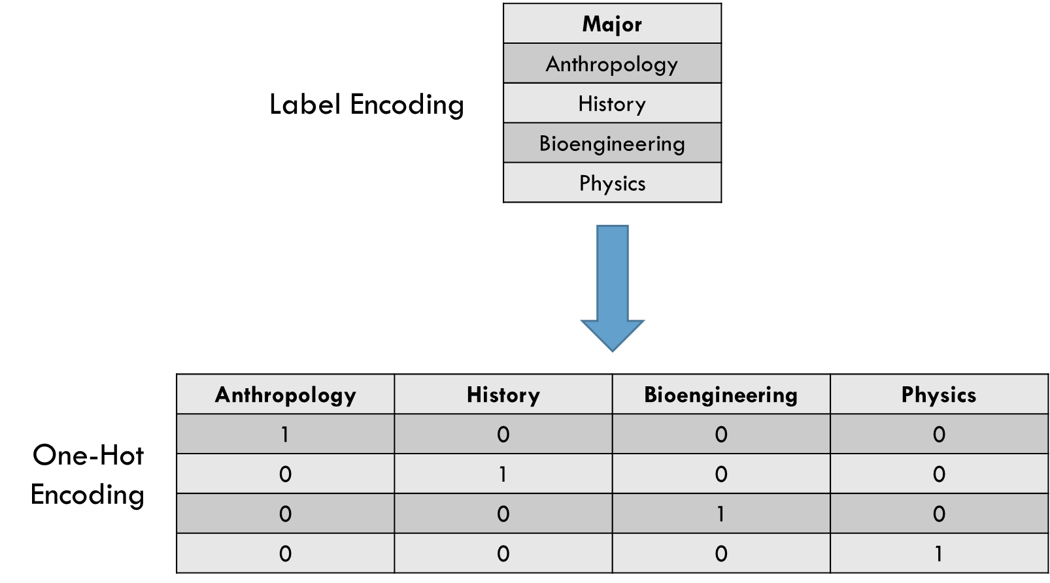

In [ ]:
# Import the library for one hot encoding

from sklearn.preprocessing import OneHotEncoder

A drawback to using OneHotEncoder is having to decipher the feature title corresponding to the observations. From the exercise above, we can see that OneHotEncoder returns a sparse matrix in alphabetical order which we can use to our advantage.

In [ ]:
# Instantiate the encoder object and one-hot encode the "Major" field
encoder = OneHotEncoder()
major_ohe = encoder.fit_transform(code_dict['major'].reshape(-1, 1))

# Convert the sparse matrix to a numpy array and pandas dataframe
major_matrix = major_ohe.toarray()
major_df = pd.DataFrame(major_matrix, columns=sorted(df.Major.unique()))

major_df.head(), df.Major.head()

The 'Major' feature is a nominal categorical variable whereas 'FirstMathClassGrade' is an ordinal categorical variable. The field, "FirstMathClassGrade", was encoded according to numerical grade points associated with each letter grade provided by the university.

In [ ]:
first_math = df['FirstMathClassGrade']

labels = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 
          'F', 'I', 'W']
codes = [4.0, 4.0, 3.7, 3.3, 3.0, 2.7, 2.3, 2.0, 1.7, 1.3, 1.0, 0.7, 
         0.0, 0.0, 0.0]

math_df = first_math.replace(labels, codes)
math_df

Now that we've encoded our variables of object type to numerical. We want to combine our dataframes. Keep the columns with numerical variables from the original dataframe and concatenate it with the encoded data frames.

In [ ]:
# Assign all columns with numerical data into a new dataframe
num_df = df.select_dtypes(exclude='object')
num_df.head()

In [ ]:
# Concatenate our numerical data frame along with the encoded dataframes along the column axis
student_df = pd.concat([num_df, major_df, math_df, binary_df], axis=1)

In [ ]:
# Sanity check
student_df.head(10)

# Check datatypes are suitable for training the ML model
#student_df.dtypes

In [ ]:
# Excluded the last column since we are checking for independence in the predictive features
check = student_df.iloc[:, :-1].corr()
check
#check.corr()
# Hard to see what's going on above. Easier to analyze independence amongst features 
# if we filter for pearsonr correlation values greater than 0.5 and less than -0.5.
check.corr()[(check.corr() >= 0.5) | (check.corr() <= -0.5)]

# Take a closer look at how ["MathPlacementScore", "@1stSemesterGPA", "FirstMathClassGrade"] relate
check[["MathPlacementScore", "@1stSemesterGPA", "FirstMathClassGrade"]].corr()

Check that your dataset has enough records

In [ ]:
display(df.info())
student_df.shape

## Implement the model
Use sklearn to split the data into train and test sets and then fit the model using the training data

In [ ]:
# Import libraries
import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

# Import libraries to score our predictive models
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
# Default train, test size ~75%, 25%, respectively

X_train, X_test, y_train, y_test = train_test_split(student_df.iloc[:, :-1],
                                                    student_df.iloc[:, -1])

In [ ]:
X_train.shape, y_train.shape

In [ ]:
# Instantiate the Logistic Regression Model
logreg = LogisticRegression(solver="liblinear")

# Fit the model to our data
logreg.fit(X_train, y_train)

In [ ]:
# Use the model to make a prediction on the X_test data

y_pred = logreg.predict(X_test)
y_pred

## Evaluate the Logistic Regression Model Performance (Accuracy, Precision, Recall)

Accuracy. The number of correct predictions over all predictions
- Accuracy = (True Positive + True Negative) / Population

Using accuracy as a metric fails with imbalanced datasets (class imbalance). In classification problems involving rare prediction events such as fraud detection, the imbalance or bias is severe. In these cases, precision and recall are preferred tests of model performance over accuracy.
<br></br>

Precision. A measure of how many predictions made in a case are correct.
- Precision = True Positives / (True Positives + False Positives)
- Precision = True Negatives / (True Negatives + False Negatives)

Recall. A measure of the number of correct predictions in a case over all of those cases.
- Recall = True Positive / (True Positives + False Negatives)
- Recall = True Negatves / (True Negatives + False Positives)

True positive (TP) - is positive and predicted positive
<br></br>
True negative (TN) - is negative and predicted negative
<br></br>
False positive (FP) - is negative but predicted positive
<br></br>
False negative (FN) - is positive but predicted negative
    


In [ ]:
# Determine the accuracy, precision and recall for the model
print(classification_report(y_test, y_pred))

In [ ]:
# Graph confusion matrix
sns.heatmap(pd.crosstab(y_test, y_pred, rownames=["Actual"], colnames=["Predicted"]), 
            annot=True, fmt="g")

In [ ]:
# Retrieve TN, FP, FN, and TP from confusion matrix
confusion_mat = pd.crosstab(y_test,y_pred)
matrix_val = []
for i in range (confusion_mat.shape[0]):
    for j in range(confusion_mat.shape[1]):
        matrix_val.append(confusion_mat.at[i,j])

matrix_val
TN, FP, FN, TP = matrix_val[0], matrix_val[1], matrix_val[2], matrix_val[3]

In [ ]:
# Accuracy. No. of correct predictions over all predictions
acc = (TP + TN) / (TP + TN + FP + FN)

# Precision. A measure of the correct predictions in a class. For example, No. of people model 
# correctly predicted to graduate over total No. of people model predicted to graduate.
prec_1 = TP / (TP + FP)
prec_0 = TN / (TN + FN)

# Recall. A measure of the correct predictions in a class over all cases in that class. For example, No. of 
# people model correctly predicted to graduate over total No. of people that graduated.
rec_1 = TP / (TP + FN)
rec_0 = TN / (TN + FP)

metrics_lst = ['Accuracy', "Precision (1)", "Precision (0)", "Recall (1)", "Recall(0)"]
calculated_metrics = [acc, prec_1, prec_0, rec_1, rec_0]

for idx in range(len(metrics_lst)):
    print(f'{metrics_lst[idx]}:  {round(calculated_metrics[idx], 3)}')

In [ ]:
# Function calls to retrieve individual metrics for predicting graduation
metrics.accuracy_score(y_test, y_pred)
metrics.precision_score(y_test, y_pred)
metrics.recall_score(y_test, y_pred)

#### Test the model on a single observation

In [ ]:
# Create a test student from the datset
X_train

# Select one student from existing dataset
test = student_df.iloc[833, :-1]
test.shape, test.info()

In [ ]:
# Adjust values for student
test['male'] = 0
test['@1stSemesterGPA'] = 3.25
test['SATScores'] = 1388
test['first_gen'] = 0

# Prepare the data by converting the pandas series data to a numpy array and reshape it
test_student = np.array(test).reshape(1,-1)
test_student

In [ ]:
# Deploy the model on the test student
# .predict() returns an array of either 0s or 1s for the target ([not graduated, graduated])
display(logreg.predict(test_student))

# predict_proba returns an array of probabilities for the target ([not graduated, graduated])
logreg.predict_proba(test_student)

## Evaluate the Logistic Regression Model (Logloss, AUC-ROC)

- Log-loss is indicative of how close the prediction probability is to the corresponding actual/true value (0 or 1 in case of binary classification).
- Receiver Operating Characteristics (ROC) is a probability curve
- Area Under the Curve (AUC) - measures the ability of a classifier to distinguish between classes

In [ ]:
## Create graduation probabilities for test set
y_pred_prob = logreg.predict_proba(X_test)
display(y_pred_prob)

In [ ]:
## Log-loss is indicative of how close the prediction probability is to the corresponding actual/true value 
## (0 or 1 in case of binary classification).  Higher divergence from actual means higher logloss
logloss_lr = metrics.log_loss(y_test, y_pred_prob[:, 1])
fpr_lr, tpr_lr, _ = metrics.roc_curve(y_test, y_pred_prob[:, 1]) # metrics.roc_curve returns three elements
auc_lr = metrics.roc_auc_score(y_test, y_pred_prob[:, 1])

## Perfect prediction: auc_lr==1
auc_lr, logloss_lr

A good way to visualize the quality of your predictions is the Receiver Operating Characteristics (ROC) curve
<div>
<img src= 'img/ROC_curve.svg' width=550>
</div>
By cmglee, MartinThoma - Roc-draft-xkcd-style.svg, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=109730045

In [ ]:
# Plot ROC curve (TPR vs FPR)
# Receiver Operating Characteristics (ROC) is a probability curve
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(fpr_lr, tpr_lr, label=f'Logloss = {logloss_lr:.3f}.  AUC = {auc_lr:.3f}')

ax.set_title('Logistic Regression - ROC', size=18)
ax.set_xlabel('False Positive Rate', size='x-large')
ax.set_ylabel('True Positive Rate', size='x-large')

ax.legend(loc='lower right')

In [ ]:
fpr_lr[-20:], tpr_lr[-20:]

## Random Forest Classifier
Create a random forest classifier model to predict whether a student will graduate from a university in four years.
<br></br>
Oversimplificaiton: a random forest is an ensemble of decision trees.


In [ ]:
# We still have X_train, X_test, y_train, y_test from the train_test_split call from earlier
randforest = RandomForestClassifier(n_estimators=100,
                                    max_depth=8,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    bootstrap=True)

randforest.fit(X_train, y_train)

In [ ]:
y_pred_rf = randforest.predict(X_test)
y_pred_prob_rf = randforest.predict_proba(X_test)
y_pred_prob_rf

logloss_rf = metrics.log_loss(y_test, y_pred_prob_rf[:, 1])
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test, y_pred_prob_rf[:, 1])
auc_rf = metrics.roc_auc_score(y_test, y_pred_prob_rf[:, 1])

auc_rf, logloss_rf

In [ ]:
print(classification_report(y_test, y_pred_rf))

In [ ]:
# Plot ROC curves for logistic regression and random forest
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(fpr_lr, tpr_lr, label=f'Logistics Regression.  Logloss: {logloss_lr:.3f}.  AUC: {auc_lr:.3f}')
ax.plot(fpr_rf, tpr_rf, label=f'Random Forest.  Logloss: {logloss_rf:.3f}.  AUC: {auc_rf:.3f}')

ax.set_title('Receiver Operating Characteristics', size=18)
ax.set_xlabel('False Positive Rate', size='x-large')
ax.set_ylabel('True Positive Rate', size='x-large')

ax.legend(loc='lower right')
plt.plot([0,1], [0,1], 'k--')

In [ ]:
# Assess the features that 'most' affect the model. 
# Will only assess the best model, gradient boosting classifier
print(randforest.feature_importances_)
X_train.columns

In [ ]:
features = list(zip(X_train.columns, randforest.feature_importances_))
filtered_feats = [(f, val) for (f, val) in features if val > 0.0113]
filtered_feats

In [ ]:
# Sort the filtered features for a cleaner looking chart
sorted_feats = sorted(filtered_feats, key=lambda tup: tup[1])
sorted_feats

# Separate the tuple according to feature label and feature value
X_feats = [tup[0] for tup in sorted_feats]
y_feats = [tup[1] for tup in sorted_feats]

X_feats, y_feats

In [ ]:
# Plot the feature importances

fig,ax = plt.subplots(figsize=(10,6))

plt.barh(y=X_feats, width=y_feats)
ax.set_title('Gradient Boost Classifier - Feature Importance', size=18)
plt.tight_layout()